---

_You are currently looking at **version 1.0** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-data-analysis/resources/0dhYG) course resource._

---

# Assignment 3 - More Pandas
All questions are weighted the same in this assignment. This assignment requires more individual learning then the last one did - you are encouraged to check out the [pandas documentation](http://pandas.pydata.org/pandas-docs/stable/) to find functions or methods you might not have used yet, or ask questions on [Stack Overflow](http://stackoverflow.com/) and tag them as pandas and python related. And of course, the discussion forums are open for interaction with your peers and the course staff.

### Question 1
Load the energy data from the file `Energy Indicators.xls`, which is a list of indicators of [energy supply and renewable electricity production](Energy%20Indicators.xls) from the [United Nations](http://unstats.un.org/unsd/environment/excel_file_tables/2013/Energy%20Indicators.xls) for the year 2013, and should be put into a DataFrame with the variable name of **energy**.

Keep in mind that this is an Excel file, and not a comma separated values file. Also, make sure to exclude the footer and header information from the datafile. The first two columns are unneccessary, so you should get rid of them, and you should change the column labels so that the columns are:

`['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable's]`

Convert the energy supply and the energy supply per capita to gigajoules (there are 1,000,000 gigajoules in a petajoule). For all countries which have missing data (e.g. data with "...") make sure this is reflected as `np.NaN` values.

Rename the following list of countries (for use in later questions):

```"Republic of Korea": "South Korea",
"United States of America": "United States",
"United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
"China, Hong Kong Special Administrative Region": "Hong Kong"```

There are also several countries with parenthesis in their name. Be sure to remove these, e.g. `'Bolivia (Plurinational State of)'` should be `'Bolivia'`.

<br>

Next, load the GDP data from the file `world_bank.csv`, which is a csv containing countries' GDP from 1960 to 2015 from [World Bank](http://data.worldbank.org/indicator/NY.GDP.MKTP.CD). Call this DataFrame **GDP**. 

Make sure to skip the header, and rename the following list of countries:

```"Korea, Rep.": "South Korea", 
"Iran, Islamic Rep.": "Iran",
"Hong Kong SAR, China": "Hong Kong"```

<br>

Finally, load the [Sciamgo Journal and Country Rank data for Energy Engineering and Power Technology](http://www.scimagojr.com/countryrank.php?category=2102), which ranks countries based on their journal contributions in the aforementioned area. Call this DataFrame **ScimEn**.

Join the three datasets: GDP, Energy, and ScimEn into a new dataset (using the intersection of country names). Use only the last 10 years (2006-2015) of GDP data and only the top 15 countries by Scimagojr 'Rank' (Rank 1 through 15). 

The index of this DataFrame should be the name of the country.

*This function should return a DataFrame with 20 columns and 15 entries.*

In [135]:
def answer_one():
    
    import pandas as pd
    
    energy = pd.read_excel('Energy Indicators.xls',skiprows = 18,skip_footer = 38,parse_cols = "C:F",header = 0,na_values=['...'])

    energy.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', "% Renewable"]
    
    energy['Energy Supply'] = energy['Energy Supply'] * 1000000
    energy['Energy Supply per Capita'] = energy['Energy Supply per Capita']
    
    energy['Country'] = energy['Country'].str.replace(r'\([^)]*\)', '')
    
    energy['Country'] = energy['Country'].str.replace(r'\d+', '')
    energy["Country"] = energy["Country"].map(str.strip)
    
    energy['Country'] = energy['Country'].replace('United States of America','United States')
    energy['Country'] = energy['Country'].replace('Republic of Korea','South Korea')
    energy['Country'] = energy['Country'].replace('United Kingdom of Great Britain and Northern Ireland','United Kingdom')
    energy['Country'] = energy['Country'].replace('China, Hong Kong Special Administrative Region','Hong Kong')
    
    GDP = pd.read_csv('world_bank.csv',skiprows = 4)
    
    GDP['Country Name'] = GDP['Country Name'].replace('Korea, Rep.','South Korea')
    GDP['Country Name'] = GDP['Country Name'].replace('Iran, Islamic Rep.','Iran')
    GDP['Country Name'] = GDP['Country Name'].replace('Hong Kong SAR, China','Hong Kong')
    
    GDP.rename(columns={'Country Name': 'Country'}, inplace=True)
       
    ScimEn = pd.read_excel('scimagojr-3.xlsx')
       
    keep_cols = ['Country','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']
    GDP = GDP[keep_cols]

    ScimEn.Rank = ScimEn.Rank.astype(float)
    SciEn_reduced = ScimEn.copy
    ScimEn_reduced = ScimEn[ScimEn.Rank <= 15]
    
    merged_df = pd.merge(pd.merge(GDP,energy,on='Country'),ScimEn_reduced, on='Country', how = 'inner')
    
    merged_df = merged_df.set_index(['Country'])

    return merged_df
answer_one()

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,Energy Supply,Energy Supply per Capita,% Renewable,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
Country,,,,,,,,,,,,,,,,,,,,
Australia,1.021939e+12,1.060340e+12,1.099644e+12,1.119654e+12,1.142251e+12,1.169431e+12,1.211913e+12,1.241484e+12,1.272520e+12,1.301251e+12,5.386000e+09,231.0,11.810810,14.0,8831,8725,90765,15606,10.28,107
Brazil,1.845080e+12,1.957118e+12,2.056809e+12,2.054215e+12,2.208872e+12,2.295245e+12,2.339209e+12,2.409740e+12,2.412231e+12,2.319423e+12,1.214900e+10,59.0,69.648030,15.0,8668,8596,60702,14396,7.00,86
Canada,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12,1.043100e+10,296.0,61.945430,6.0,17899,17620,215003,40930,12.01,149
China,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12,1.271910e+11,93.0,19.754910,1.0,127050,126767,597237,411683,4.70,138
Germany,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12,1.326100e+10,165.0,17.901530,7.0,17027,16831,140566,27426,8.26,126
Spain,1.414823e+12,1.468146e+12,1.484530e+12,1.431475e+12,1.431673e+12,1.417355e+12,1.380216e+12,1.357139e+12,1.375605e+12,1.419821e+12,4.923000e+09,106.0,37.968590,12.0,9428,9330,123336,23964,13.08,115
France,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12,1.059700e+10,166.0,17.020280,9.0,13153,12973,130632,28601,9.93,114
United Kingdom,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12,7.920000e+09,124.0,10.600470,4.0,20944,20357,206091,37874,9.84,139
India,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12,3.319500e+10,26.0,14.969080,8.0,15005,14841,128763,37209,8.58,115


### Question 2 (6.6%)
The previous question joined three datasets then reduced this to just the top 15 entries. When you joined the datasets, but before you reduced this to the top 15 items, how many entries did you lose?

*This function should return a single number.*

In [152]:
def answer_two():
    
    import pandas as pd
    
    energy = pd.read_excel('Energy Indicators.xls',
                           skiprows = 17,
                           skip_footer = 38,
                           parse_cols = "C:F",
                           header = 0,
                           na_values=['...'])
    
    energy.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', "% Renewable"]
    
    energy['Energy Supply'] = energy['Energy Supply'] * 1000000
    energy['Energy Supply per Capita'] = energy['Energy Supply per Capita']
    
    energy['Country'] = energy['Country'].str.replace(r'\([^)]*\)', '')
    
    energy['Country'] = energy['Country'].str.replace(r'\d+', '')
    energy["Country"] = energy["Country"].map(str.strip)
    
    energy['Country'] = energy['Country'].replace('United States of America','United States')
    energy['Country'] = energy['Country'].replace('Republic of Korea','South Korea')
    energy['Country'] = energy['Country'].replace('United Kingdom of Great Britain and Northern Ireland','United Kingdom')
    energy['Country'] = energy['Country'].replace('China, Hong Kong Special Administrative Region','Hong Kong')
    
    GDP = pd.read_csv('world_bank.csv',skiprows = 4)
    
    GDP['Country Name'] = GDP['Country Name'].replace('Korea, Rep.','South Korea')
    GDP['Country Name'] = GDP['Country Name'].replace('Iran, Islamic Rep.','Iran')
    GDP['Country Name'] = GDP['Country Name'].replace('Hong Kong SAR, China','Hong Kong')
    
    GDP.rename(columns={'Country Name': 'Country'}, inplace=True)
    
    ScimEn = pd.read_excel('scimagojr-3.xlsx')

    keep_cols = ['Country','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']
    GDP = GDP[keep_cols]
    
    ScimEn.Rank = ScimEn.Rank.astype(float)
    SciEn_reduced = ScimEn.copy
    ScimEn_reduced = ScimEn[ScimEn.Rank <= 15]
    
    
    merged_df1 = pd.merge(energy,GDP,on='Country', how = 'inner')
    merged_df = pd.merge(merged_df1,ScimEn, on = 'Country',how = 'inner')
    
    merged_df = merged_df.set_index(['Country'])

    merged_df_full1 = pd.merge(GDP,energy,on='Country', how = 'outer')
    merged_df_full = pd.merge(merged_df_full1,ScimEn, how = 'outer')
    
    merged_df_full = merged_df_full.set_index(['Country'])
    
    lost_rows =  len(merged_df_full) - len(merged_df)
    return lost_rows

answer_two()

156

### Question 3 (6.6%)
What are the top 15 countries for average GDP over the last 10 years?

*This function should return a Series named `avgGDP` with 15 countries and their average GDP sorted in descending order.*

In [134]:
def answer_three():
    Top15 = answer_one()
    
    Top15['avgGDP'] = Top15[["2006", "2007", "2008", "2009","2010","2011",
                    "2012","2013","2014","2015"]].mean(axis=1)
    
    
    Top15 = Top15.sort_values(by = 'avgGDP',ascending = False)
    
    avgGDP = Top15['avgGDP']
    
    return avgGDP
answer_three()

Country
United States         1.536434e+13
China                 6.348609e+12
Japan                 5.542208e+12
Germany               3.493025e+12
France                2.681725e+12
United Kingdom        2.487907e+12
Brazil                2.189794e+12
Italy                 2.120175e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Spain                 1.418078e+12
Australia             1.164043e+12
South Korea           1.106715e+12
Iran                  4.441558e+11
Name: avgGDP, dtype: float64

### Question 4 (6.6%)
By how much had the GDP changed over the 10 year span for the country with the 6th largest average GDP?

*This function should return a single number.*

In [35]:
def answer_four():
    Top15 = answer_one()
    Top15['avgGDP'] = Top15[["2006", "2007", "2008", "2009","2010","2011",
                    "2012","2013","2014","2015"]].mean(axis=1)
    Top15 = Top15.sort_values(by = 'avgGDP',ascending = False)
    sixth_largest = Top15.ix[5]
    return sixth_largest['2015'] - sixth_largest['2006']
answer_four()

246702696075.3999

### Question 5 (6.6%)
What is the mean energy supply per capita?

*This function should return a single number.*

In [137]:
def answer_five():
    Top15 = answer_one()
    energy_supply = Top15['Energy Supply per Capita']

    return energy_supply.mean()
    
answer_five()

157600000.0

### Question 6 (6.6%)
What country has the maximum % Renewable and what is the percentage?

*This function should return a tuple with the name of the country and the percentage.*

In [59]:
def answer_six():
    
    import pandas as pd
    
    Top15 = answer_one()
    max_perc_renewable = Top15[["% Renewable"]].idxmax(axis=0)
    
    max_all = Top15.ix[max_perc_renewable]
    max_all.reset_index(inplace = True)

    subset = max_all[['Country', '% Renewable']]
    List1 = subset['Country'].tolist()
    List2 = subset['% Renewable'].tolist()
    List3 = List1 + List2
    
    return tuple(List3)
answer_six()

('Brazil', 69.648030000000006)

### Question 7 (6.6%)
Create a new column that is the ratio of Self-Citations to Total Citations. 
What is the maximum value for this new column, and what country has the highest ratio?

*This function should return a tuple with the name of the country and the ratio.*

In [60]:
def answer_seven():
    Top15 = answer_one()
    
    Top15['ratio'] = Top15['Self-citations'] / Top15['Citations']
    max_ratio = Top15[["ratio"]].idxmax(axis=0)
    
    max_all = Top15.ix[max_ratio]
    max_all.reset_index(inplace = True)

    subset = max_all[['Country', 'ratio']]
    List1 = subset['Country'].tolist()
    List2 = subset['ratio'].tolist()
    List3 = List1 + List2
    
    return tuple(List3)
answer_seven()

('China', 0.68931261793894216)

### Question 8 (6.6%)

Create a column that estimates the population using Energy Supply and Energy Supply per capita. 
What is the third most populous country according to this estimate?

*This function should return a single string value.*

In [142]:
def answer_eight():
    Top15 = answer_one()
    Top15['pop_est'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    Top15 = Top15.sort_values(by = 'pop_est',ascending = False)
    return Top15.index[2]

answer_eight()

'United States'

### Question 9 (6.6%)
Create a column that estimates the number of citable documents per person. 
What is the correlation between the number of citable documents per capita and the energy supply per capita?

*This function should return a single number.*

*(Optional: Use the built-in function `plot9()` to visualize the relationship between Energy Supply per Capita vs. Citable docs per Capita).*

In [143]:
def answer_nine():
    Top15 = answer_one()
    Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    Top15['Citable docs per Capita'] = Top15['Citable documents'] / Top15['PopEst']
    corr_vars = Top15[['Citable docs per Capita', 'Energy Supply per Capita']]
    corr_output = corr_vars.corr()
    
    return corr_output.loc['Citable docs per Capita','Energy Supply per Capita']
answer_nine()

0.79400104354429457

In [144]:
def plot9():
    import matplotlib as plt
    %matplotlib inline
    
    Top15 = answer_one()
    Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    Top15['Citable docs per Capita'] = Top15['Citable documents'] / Top15['PopEst']
    Top15.plot(x='Citable docs per Capita', y='Energy Supply per Capita', kind='scatter', xlim=[0, 0.0006])

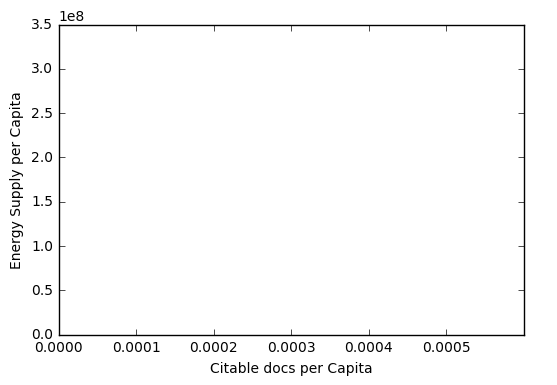

In [145]:
#plot9()

### Question 10 (6.6%)
Create a new column with a 1 if the country's % Renewable value is at or above the median for all countries in the top 15.

*This function should return a series named `HighRenew` whose index is the country name sorted in ascending order of rank.*

In [69]:
def answer_ten():
    import numpy as np
    
    Top15 = answer_one()
    renewable_perc = Top15["% Renewable"].to_frame()
    
    median = renewable_perc.median()
    median = median.iloc[0]
    
    Top15['HighRenew'] = np.where(Top15["% Renewable"]>=median, 1, 0)
    Top15 = Top15.sort_values(by = 'Rank',ascending = True)
    
    HighRenew = Top15['HighRenew']
    
    return HighRenew

answer_ten()

Country
China                 1
United States         0
Japan                 0
United Kingdom        0
Russian Federation    1
Canada                1
Germany               1
India                 0
France                1
South Korea           0
Italy                 1
Spain                 1
Iran                  0
Australia             0
Brazil                1
Name: HighRenew, dtype: int64

### Question 11 (6.6%)
Use the following dictionary to group the Countries by Continent, then create a dateframe that displays the sample size (the number of countries in each continent bin), and the sum, mean, and std deviation for the estimated population of each country.

```python
ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
```

*This function should return a DataFrame with index named Continent `['Asia', 'Australia', 'Europe', 'North America', 'South America']` and columns `['size', 'sum', 'mean', 'std']`*

In [86]:
def answer_eleven():
    
    import pandas as pd
    import numpy as np
    
    Top15 = answer_one()
    
    Continents = {'Country': ['China', 'United States', 'Japan','United Kingdom',
                             'Russian Federation','Canada','Germany','India','France','South Korea',
                             'Italy','Spain','Iran','Australia','Brazil'],
                  'Continent': ['Asia','North America','Asia','Europe','Europe','North America',
                               'Europe','Asia','Europe','Asia','Europe','Europe','Asia',
                               'Australia','South America']}
    
    Continents_df = pd.DataFrame(Continents)
    Continents_df = Continents_df
    Continents_df.set_index(['Country'], inplace = True)
    
    Top15 = pd.merge(Top15,Continents_df,left_index = True, right_index = True, how = 'inner')
    Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    
    ans = Top15.set_index('Continent').groupby(level=0)['PopEst'].agg({'size': np.size, 'sum': np.sum, 'mean': np.mean,'std': np.std})

    ans = ans[['size', 'sum', 'mean', 'std']]

    return ans

answer_eleven()

,size,sum,mean,std
Continent,,,,
Asia,5.0,2898.666387,579.733277,679.097888
Australia,1.0,23.316017,23.316017,NaN
Europe,6.0,457.929667,76.321611,34.647667
North America,2.0,352.855249,176.427625,199.669645
South America,1.0,205.915254,205.915254,NaN


### Question 12 (6.6%)
Cut % Renewable into 5 bins. Group Top15 by the Continent, as well as these new % Renewable bins. How many countries are in each of these groups?

*This function should return a Series with a MultiIndex of `Continent`, then the bins for `% Renewable`. Do not include groups with no countries.*

In [92]:
def answer_twelve():
    
    import pandas as pd
    
    Top15 = answer_one()
    
    
    Continents = {'Country': ['China', 'United States', 'Japan','United Kingdom',
                             'Russian Federation','Canada','Germany','India','France','South Korea',
                             'Italy','Spain','Iran','Australia','Brazil'],
                  'Continent': ['Asia','North America','Asia','Europe','Europe','North America',
                               'Europe','Asia','Europe','Asia','Europe','Europe','Asia',
                               'Australia','South America']}
    
    Continents_df = pd.DataFrame(Continents)
    Continents_df = Continents_df
    Continents_df.set_index(['Country'], inplace = True)
    
    Top15 = pd.merge(Top15,Continents_df,left_index = True, right_index = True, how = 'inner')
    
    quantiles = pd.cut(Top15["% Renewable"],5).to_frame()
    quantiles.columns = ["quantile_perc_renewable"]
    Top15 = pd.merge(Top15,quantiles,left_index = True, right_index = True, how = 'inner')
    
    result = Top15.groupby(['Continent','quantile_perc_renewable']).size()
    
    return result

answer_twelve()

Continent      quantile_perc_renewable
Asia           (2.212, 15.753]            4
               (15.753, 29.227]           1
Australia      (2.212, 15.753]            1
Europe         (2.212, 15.753]            1
               (15.753, 29.227]           3
               (29.227, 42.701]           2
North America  (2.212, 15.753]            1
               (56.174, 69.648]           1
South America  (56.174, 69.648]           1
dtype: int64

### Question 13 (6.6%)
Convert the Population Estimate series to a string with thousands separator (using commas)

e.g. 12345678.90 -> 12,345,678.90

*This function should return a Series `PopEst` whose index is the country name and whose values are the population estimate string.*

In [102]:
def answer_thirteen():

    import numpy as np
    Top15 = answer_one()
    
    Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    
    Top15['PopEst_format'] = Top15['PopEst'].apply(lambda x: '{0:,}'.format(x))
    Top15['PopEst_format'].apply(str)
    
    PopEst = Top15['PopEst_format']
    
    return PopEst

answer_thirteen()

Country
Australia              23.316017316017316
Brazil                 205.91525423728814
Canada                  35.23986486486486
China                 1,367.6451612903227
Germany                 80.36969696969697
Spain                  46.443396226415096
France                  63.83734939759036
United Kingdom          63.87096774193548
India                 1,276.7307692307693
Iran                    77.07563025210084
Italy                  59.908256880733944
Japan                  127.40939597315436
South Korea             49.80542986425339
Russian Federation                  143.5
United States          317.61538461538464
Name: PopEst_format, dtype: object

### Optional

Use the built in function `plot_optional()` to see an example visualization.

In [232]:
def plot_optional():
    import matplotlib as plt
    %matplotlib inline
    ax = Top15.plot(x='Rank', y='% Renewable', kind='scatter', 
                    c=['#e41a1c','#377eb8','#e41a1c','#4daf4a','#4daf4a','#377eb8','#4daf4a','#e41a1c',
                       '#4daf4a','#e41a1c','#4daf4a','#4daf4a','#e41a1c','#dede00','#ff7f00'], 
                    xticks=range(1,16), s=6*Top15['2014']/10**10, alpha=.75, figsize=[16,6]);

    for i, txt in enumerate(Top15.index):
        ax.annotate(txt, [Top15['Rank'][i], Top15['% Renewable'][i]], ha='center')

    print("This is an example of a visualization that can be created to help understand the data. \
This is a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' \
2014 GDP, and the color corresponds to the continent.")

In [233]:
#plot_optional()